    WELL      X(ft)     Y(ft)  Elevation Kelly Bushing (ft)  \
0    WP0  137106.82  83818.47                        193.32   
1    WP1  132460.98  85832.77                        187.15   
2    WP2  133634.00  82144.52                        164.55   
3    WP3  140892.57  81747.12                        179.92   
4    WP4  109951.43  89343.45                        186.21   
5    WP5  123950.95  92227.31                        172.80   
6    WP6  111035.32  88692.32                        182.66   
7    WP7  112439.69  85560.85                        181.09   
8    WP8  127369.74  91739.99                        180.04   
9    WP9  115943.69  86730.44                        178.25   
10  WP10  134042.86  82411.27                        184.33   
11  WP11  115725.49  86866.60                        192.03   
12  WP12  133136.98  93691.55                        170.35   
13  WP13  119311.27  89234.02                        190.28   
14  WP14  134837.26  83865.82                        18

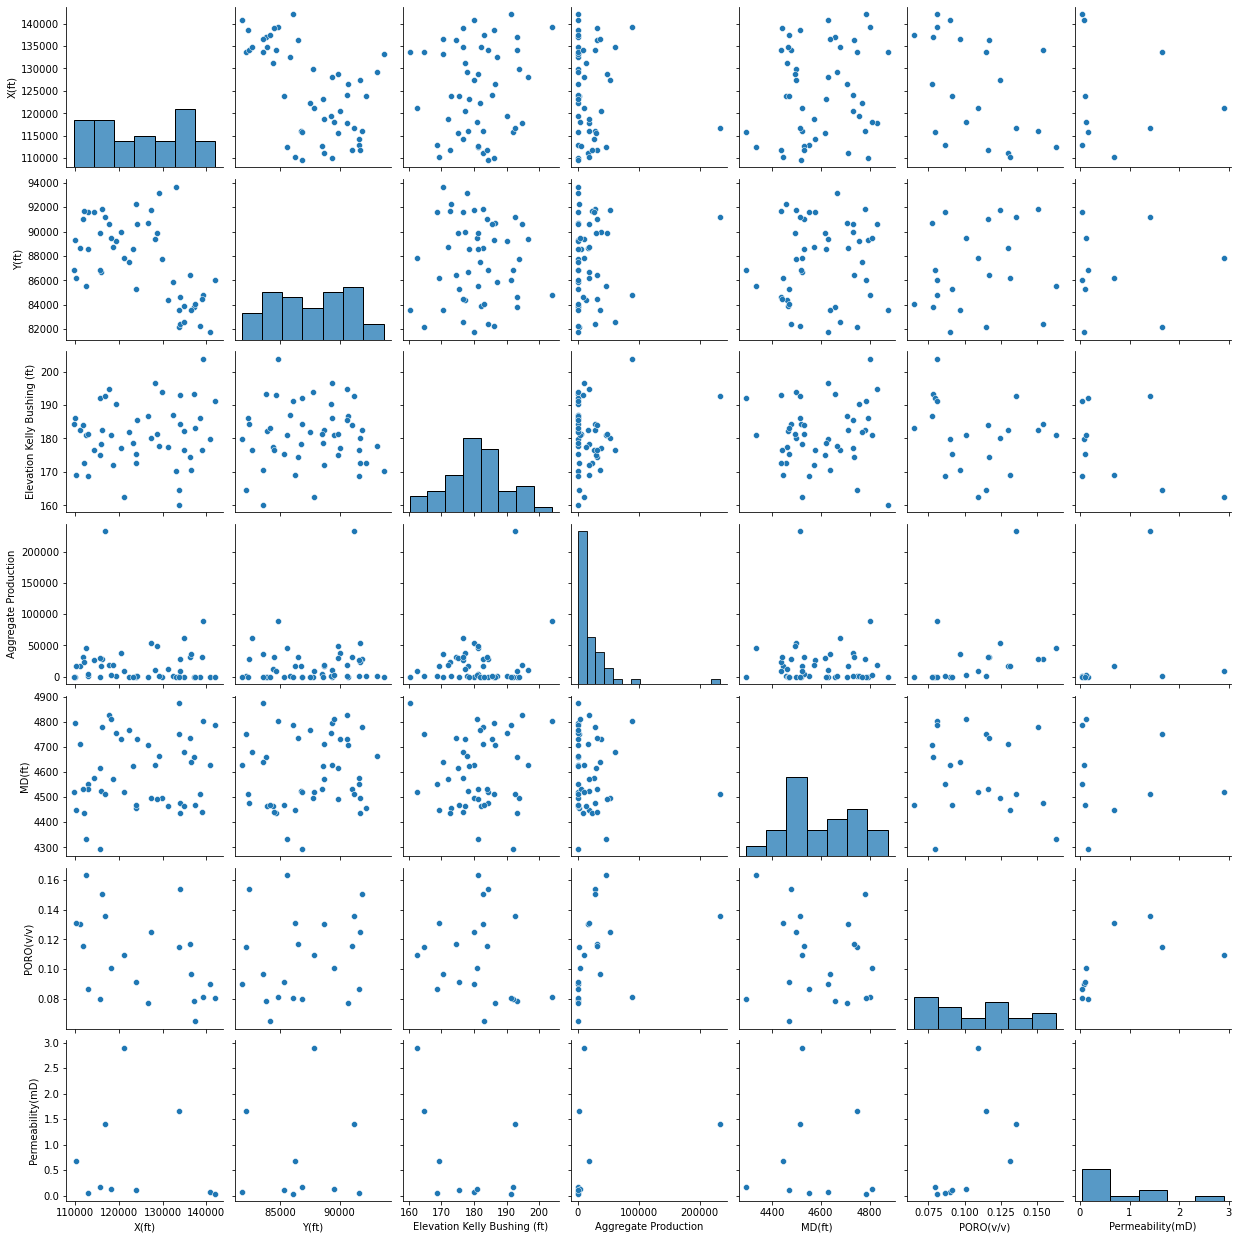

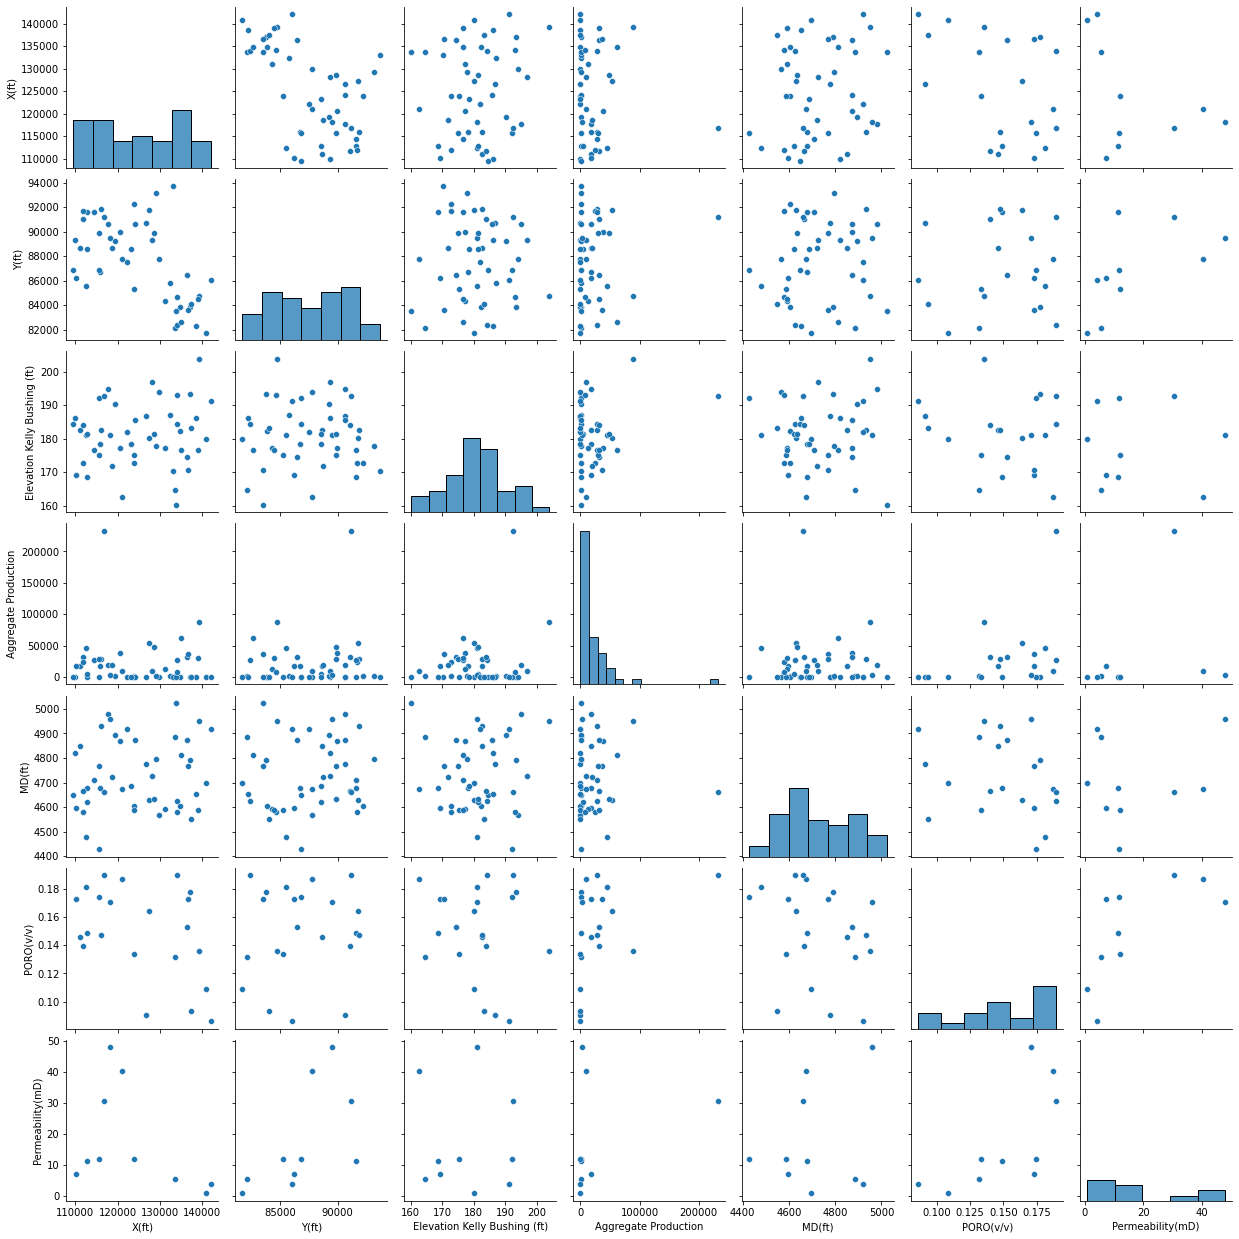

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Replaces -999 values with NaN
def make_nan(df):
    column_names = df.columns.values.tolist() # List of column names
    for column in column_names:
        if column != 'Zone': # Filled with strings so it can cause error
            df.loc[df[column] < -997, column] = np.nan # Replace -999 with NaN
        
def fill_data(df, well_log, well_log_data):
    # Get mean values for each well feature
    feature_means = df.mean(numeric_only=True).T

    # Append feature_means[index] into data_list[well][index]
    for feature in range(len(feature_means)):
        if feature != 12: # Don't have a mean for 'Zone' value
            well_log_data[well_log][feature] = feature_means[feature]

def main():
    # Code modified from https://www.geeksforgeeks.org/how-to-read-all-csv-files-in-a-folder-in-pandas/
    # Get CSV files from Well_Log folder
    path = str(os.getcwd()) + '/Well_Log'
    all_logs = glob.glob(os.path.join(path, "WP*.csv"))

    # Store all well log info
    well_log_data = [ [0]*12 for _ in range(50) ]
    well_log_data_upper = [ [0]*12 for _ in range(50) ]
    well_log_data_lower = [ [0]*12 for _ in range(50) ]

    # Loop through each log individually
    for well_log in range(len(all_logs)):
        df = pd.read_csv(all_logs[well_log])
        # well_name = all_logs[well_log].split('\\')[-1].split('.')[0]
        column_headers = df.columns
        column_headers = column_headers[:-1]

        # Convert -999 to NaN
        make_nan(df)
        
        # Get upper and lower here
        upper_df = df.loc[df['Zone'] == 'Upper']
        lower_df = df.loc[df['Zone'] == 'Lower']

        fill_data(df, well_log, well_log_data)
        fill_data(upper_df, well_log, well_log_data_upper)
        fill_data(lower_df, well_log, well_log_data_lower)


    # Create a dataframe with the mean values
    mean_df = pd.DataFrame(well_log_data, columns = column_headers)
    mean_df_upper = pd.DataFrame(well_log_data_upper, columns = column_headers)
    mean_df_lower = pd.DataFrame(well_log_data_lower, columns = column_headers)


    # Get path to csv file with production info
    production_csv_path = str(os.getcwd()) + '\Well_Head_and_Completion_Aggprod.csv'  
    production_df = pd.read_csv(production_csv_path)

    # Combine the dataframes
    combined_df = pd.concat([production_df, mean_df.set_index(production_df.index)], axis=1)
    del combined_df['Completion']    
    print(combined_df)    
    print(combined_df.describe().T)

    combined_df_upper = pd.concat([production_df, mean_df_upper.set_index(production_df.index)], axis=1)
    del combined_df_upper['Completion']
    print(combined_df_upper)    
    print(combined_df_upper.describe().T)

    combined_df_lower = pd.concat([production_df, mean_df_lower.set_index(production_df.index)], axis=1)
    del combined_df_lower['Completion']
    print(combined_df_lower)    
    print(combined_df_lower.describe().T)

    headers = combined_df.columns
    sns.pairplot(combined_df_upper, vars = ['X(ft)', 'Y(ft)', 'Elevation Kelly Bushing (ft)', 'Aggregate Production', 'MD(ft)', 'PORO(v/v)', 'Permeability(mD)'], markers = 'o')
    sns.pairplot(combined_df_lower, vars = ['X(ft)', 'Y(ft)', 'Elevation Kelly Bushing (ft)', 'Aggregate Production', 'MD(ft)', 'PORO(v/v)', 'Permeability(mD)'], markers = 'o')



if __name__ == '__main__':
    main()

    WELL      X(ft)     Y(ft)  Elevation Kelly Bushing (ft)  \
0    WP0  137106.82  83818.47                        193.32   
1    WP1  132460.98  85832.77                        187.15   
2    WP2  133634.00  82144.52                        164.55   
3    WP3  140892.57  81747.12                        179.92   
4    WP4  109951.43  89343.45                        186.21   
5    WP5  123950.95  92227.31                        172.80   
6    WP6  111035.32  88692.32                        182.66   
7    WP7  112439.69  85560.85                        181.09   
8    WP8  127369.74  91739.99                        180.04   
9    WP9  115943.69  86730.44                        178.25   
10  WP10  134042.86  82411.27                        184.33   
11  WP11  115725.49  86866.60                        192.03   
12  WP12  133136.98  93691.55                        170.35   
13  WP13  119311.27  89234.02                        190.28   
14  WP14  134837.26  83865.82                        18

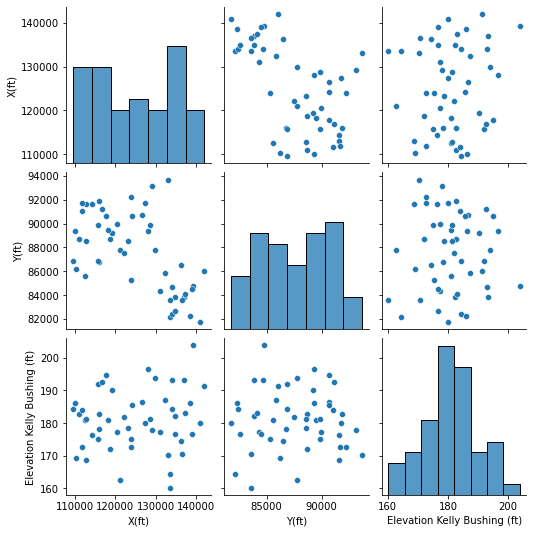

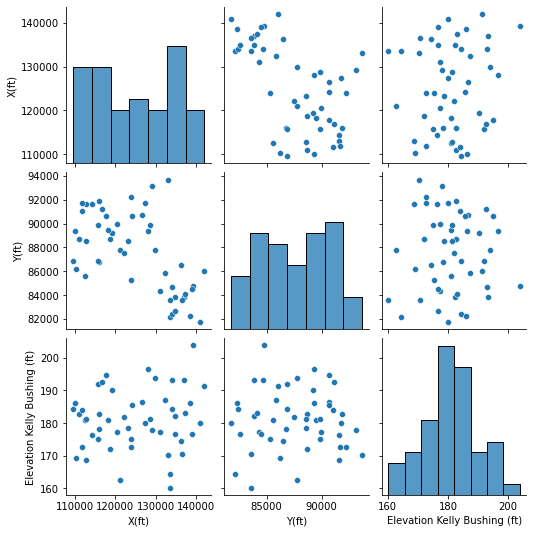

NameError: name 'combined_df_upper' is not defined

    WELL      X(ft)     Y(ft)  Elevation Kelly Bushing (ft)  \
0    WP0  137106.82  83818.47                        193.32   
1    WP1  132460.98  85832.77                        187.15   
2    WP2  133634.00  82144.52                        164.55   
3    WP3  140892.57  81747.12                        179.92   
4    WP4  109951.43  89343.45                        186.21   
5    WP5  123950.95  92227.31                        172.80   
6    WP6  111035.32  88692.32                        182.66   
7    WP7  112439.69  85560.85                        181.09   
8    WP8  127369.74  91739.99                        180.04   
9    WP9  115943.69  86730.44                        178.25   
10  WP10  134042.86  82411.27                        184.33   
11  WP11  115725.49  86866.60                        192.03   
12  WP12  133136.98  93691.55                        170.35   
13  WP13  119311.27  89234.02                        190.28   
14  WP14  134837.26  83865.82                        18

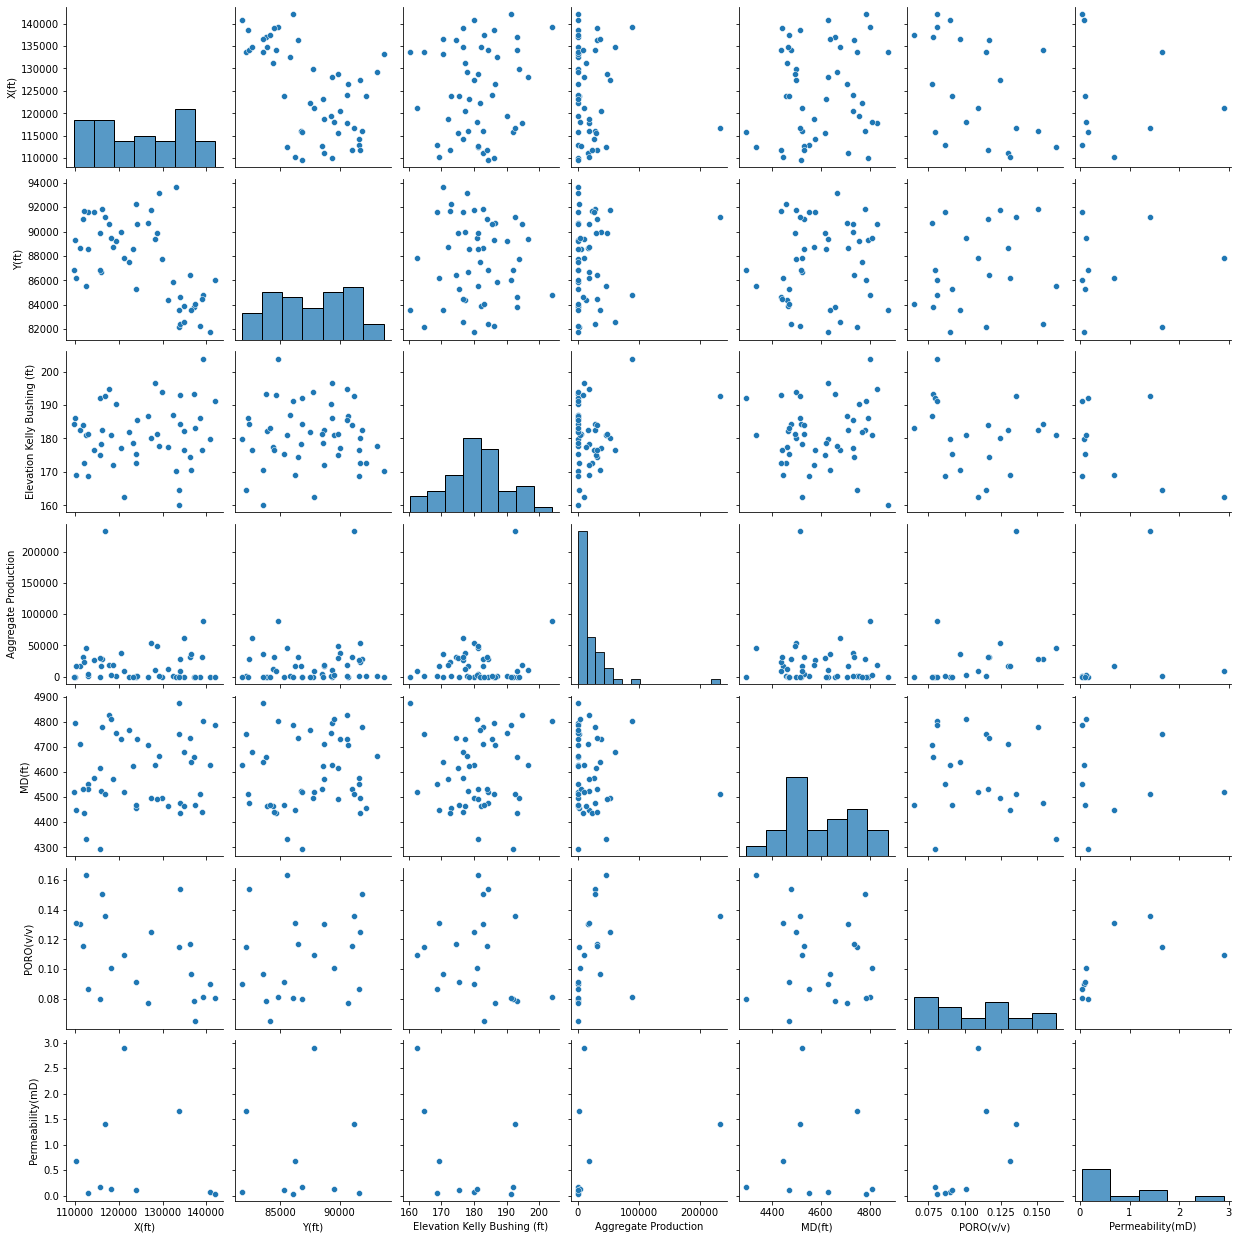

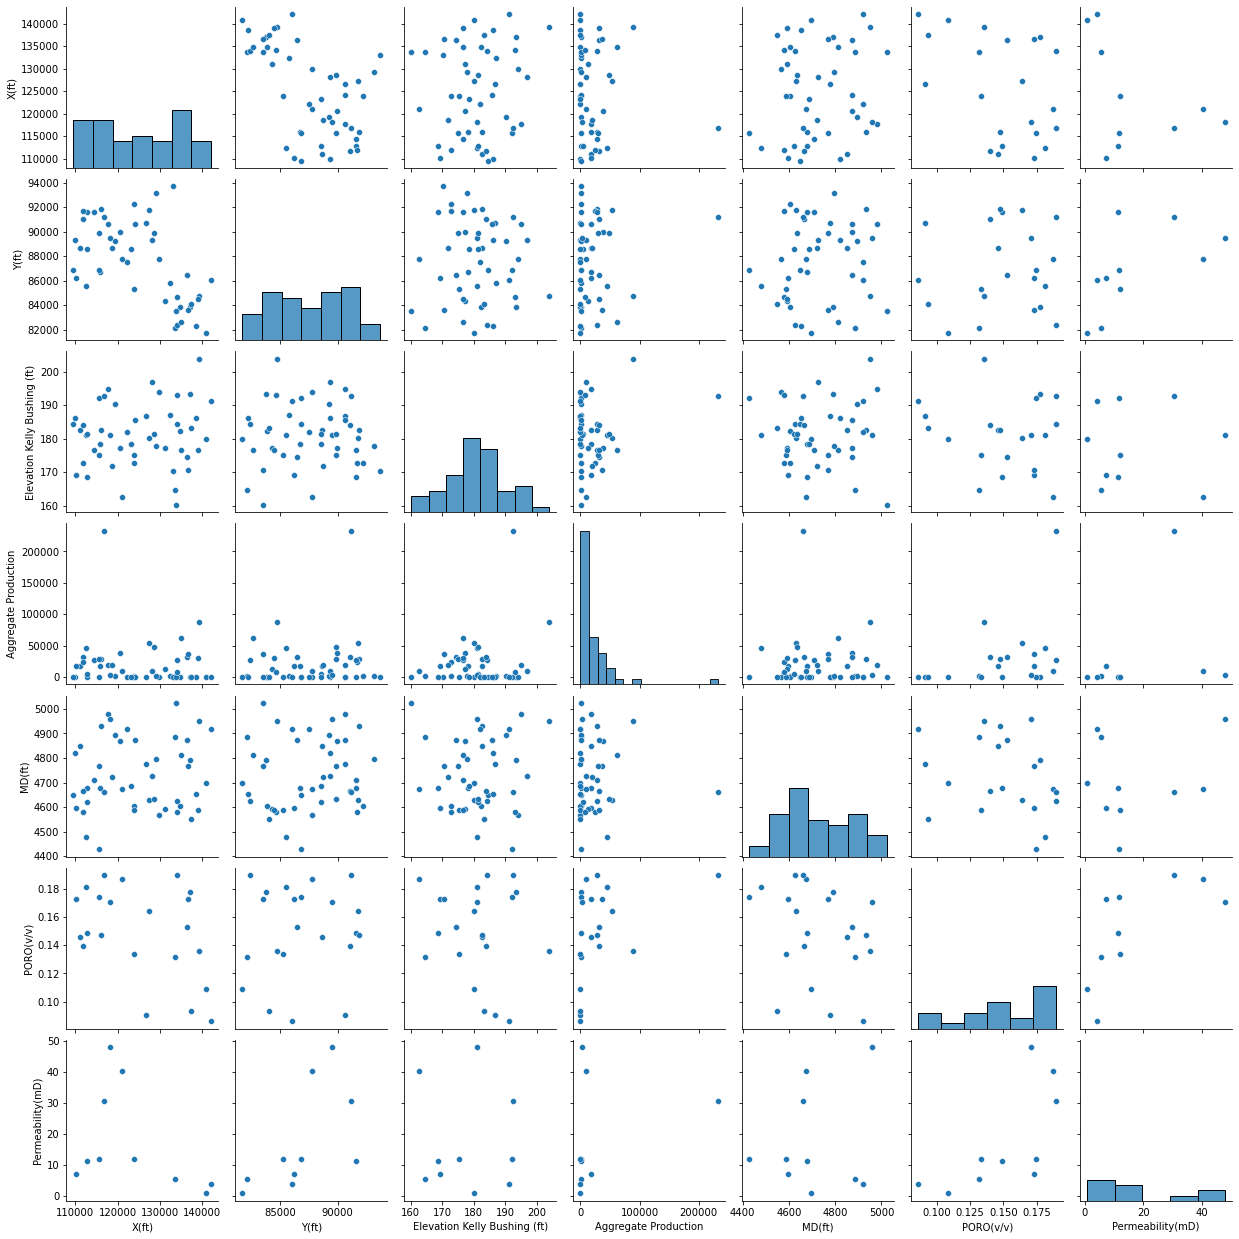

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Replaces -999 values with NaN
def make_nan(df):
    column_names = df.columns.values.tolist() # List of column names
    for column in column_names:
        if column != 'Zone': # Filled with strings so it can cause error
            df.loc[df[column] < -997, column] = np.nan # Replace -999 with NaN
        
def fill_data(df, well_log, well_log_data):
    # Get mean values for each well feature
    feature_means = df.mean(numeric_only=True).T

    # Append feature_means[index] into data_list[well][index]
    for feature in range(len(feature_means)):
        if feature != 12: # Don't have a mean for 'Zone' value
            well_log_data[well_log][feature] = feature_means[feature]

def main():
    # Code modified from https://www.geeksforgeeks.org/how-to-read-all-csv-files-in-a-folder-in-pandas/
    # Get CSV files from Well_Log folder
    path = str(os.getcwd()) + '/Well_Log'
    all_logs = glob.glob(os.path.join(path, "WP*.csv"))

    # Store all well log info
    well_log_data = [ [0]*12 for _ in range(50) ]
    well_log_data_upper = [ [0]*12 for _ in range(50) ]
    well_log_data_lower = [ [0]*12 for _ in range(50) ]

    # Loop through each log individually
    for well_log in range(len(all_logs)):
        df = pd.read_csv(all_logs[well_log])
        # well_name = all_logs[well_log].split('\\')[-1].split('.')[0]
        column_headers = df.columns
        column_headers = column_headers[:-1]

        # Convert -999 to NaN
        make_nan(df)
        
        # Get upper and lower here
        upper_df = df.loc[df['Zone'] == 'Upper']
        lower_df = df.loc[df['Zone'] == 'Lower']

        fill_data(df, well_log, well_log_data)
        fill_data(upper_df, well_log, well_log_data_upper)
        fill_data(lower_df, well_log, well_log_data_lower)


    # Create a dataframe with the mean values
    mean_df = pd.DataFrame(well_log_data, columns = column_headers)
    mean_df_upper = pd.DataFrame(well_log_data_upper, columns = column_headers)
    mean_df_lower = pd.DataFrame(well_log_data_lower, columns = column_headers)


    # Get path to csv file with production info
    production_csv_path = str(os.getcwd()) + '\Well_Head_and_Completion_Aggprod.csv'  
    production_df = pd.read_csv(production_csv_path)

    # Combine the dataframes
    combined_df = pd.concat([production_df, mean_df.set_index(production_df.index)], axis=1)
    del combined_df['Completion']    
    print(combined_df)    
    print(combined_df.describe().T)

    combined_df_upper = pd.concat([production_df, mean_df_upper.set_index(production_df.index)], axis=1)
    del combined_df_upper['Completion']
    print(combined_df_upper)    
    print(combined_df_upper.describe().T)

    combined_df_lower = pd.concat([production_df, mean_df_lower.set_index(production_df.index)], axis=1)
    del combined_df_lower['Completion']
    print(combined_df_lower)    
    print(combined_df_lower.describe().T)

    headers = combined_df.columns
    sns.pairplot(combined_df_upper, vars = ['X(ft)', 'Y(ft)', 'Elevation Kelly Bushing (ft)', 'Aggregate Production', 'MD(ft)', 'PORO(v/v)', 'Permeability(mD)', 'RHOB(g/cm3)', 'DTS(us/ft)', 'DT(us/ft)', 'PEF(B/E)', 'RD(OHMM)', 'RS(OHMM)', 'ROP', 'DENC(g/cm3)', 'NPHI(v/v)'], markers = 'o')
    sns.pairplot(combined_df_lower, vars = ['X(ft)', 'Y(ft)', 'Elevation Kelly Bushing (ft)', 'Aggregate Production', 'MD(ft)', 'PORO(v/v)', 'Permeability(mD)', 'RHOB(g/cm3)', 'DTS(us/ft)', 'DT(us/ft)', 'PEF(B/E)', 'RD(OHMM)', 'RS(OHMM)', 'ROP', 'DENC(g/cm3)', 'NPHI(v/v)'], markers = 'o')



if __name__ == '__main__':
    main()

    WELL      X(ft)     Y(ft)  Elevation Kelly Bushing (ft)  \
0    WP0  137106.82  83818.47                        193.32   
1    WP1  132460.98  85832.77                        187.15   
2    WP2  133634.00  82144.52                        164.55   
3    WP3  140892.57  81747.12                        179.92   
4    WP4  109951.43  89343.45                        186.21   
5    WP5  123950.95  92227.31                        172.80   
6    WP6  111035.32  88692.32                        182.66   
7    WP7  112439.69  85560.85                        181.09   
8    WP8  127369.74  91739.99                        180.04   
9    WP9  115943.69  86730.44                        178.25   
10  WP10  134042.86  82411.27                        184.33   
11  WP11  115725.49  86866.60                        192.03   
12  WP12  133136.98  93691.55                        170.35   
13  WP13  119311.27  89234.02                        190.28   
14  WP14  134837.26  83865.82                        18

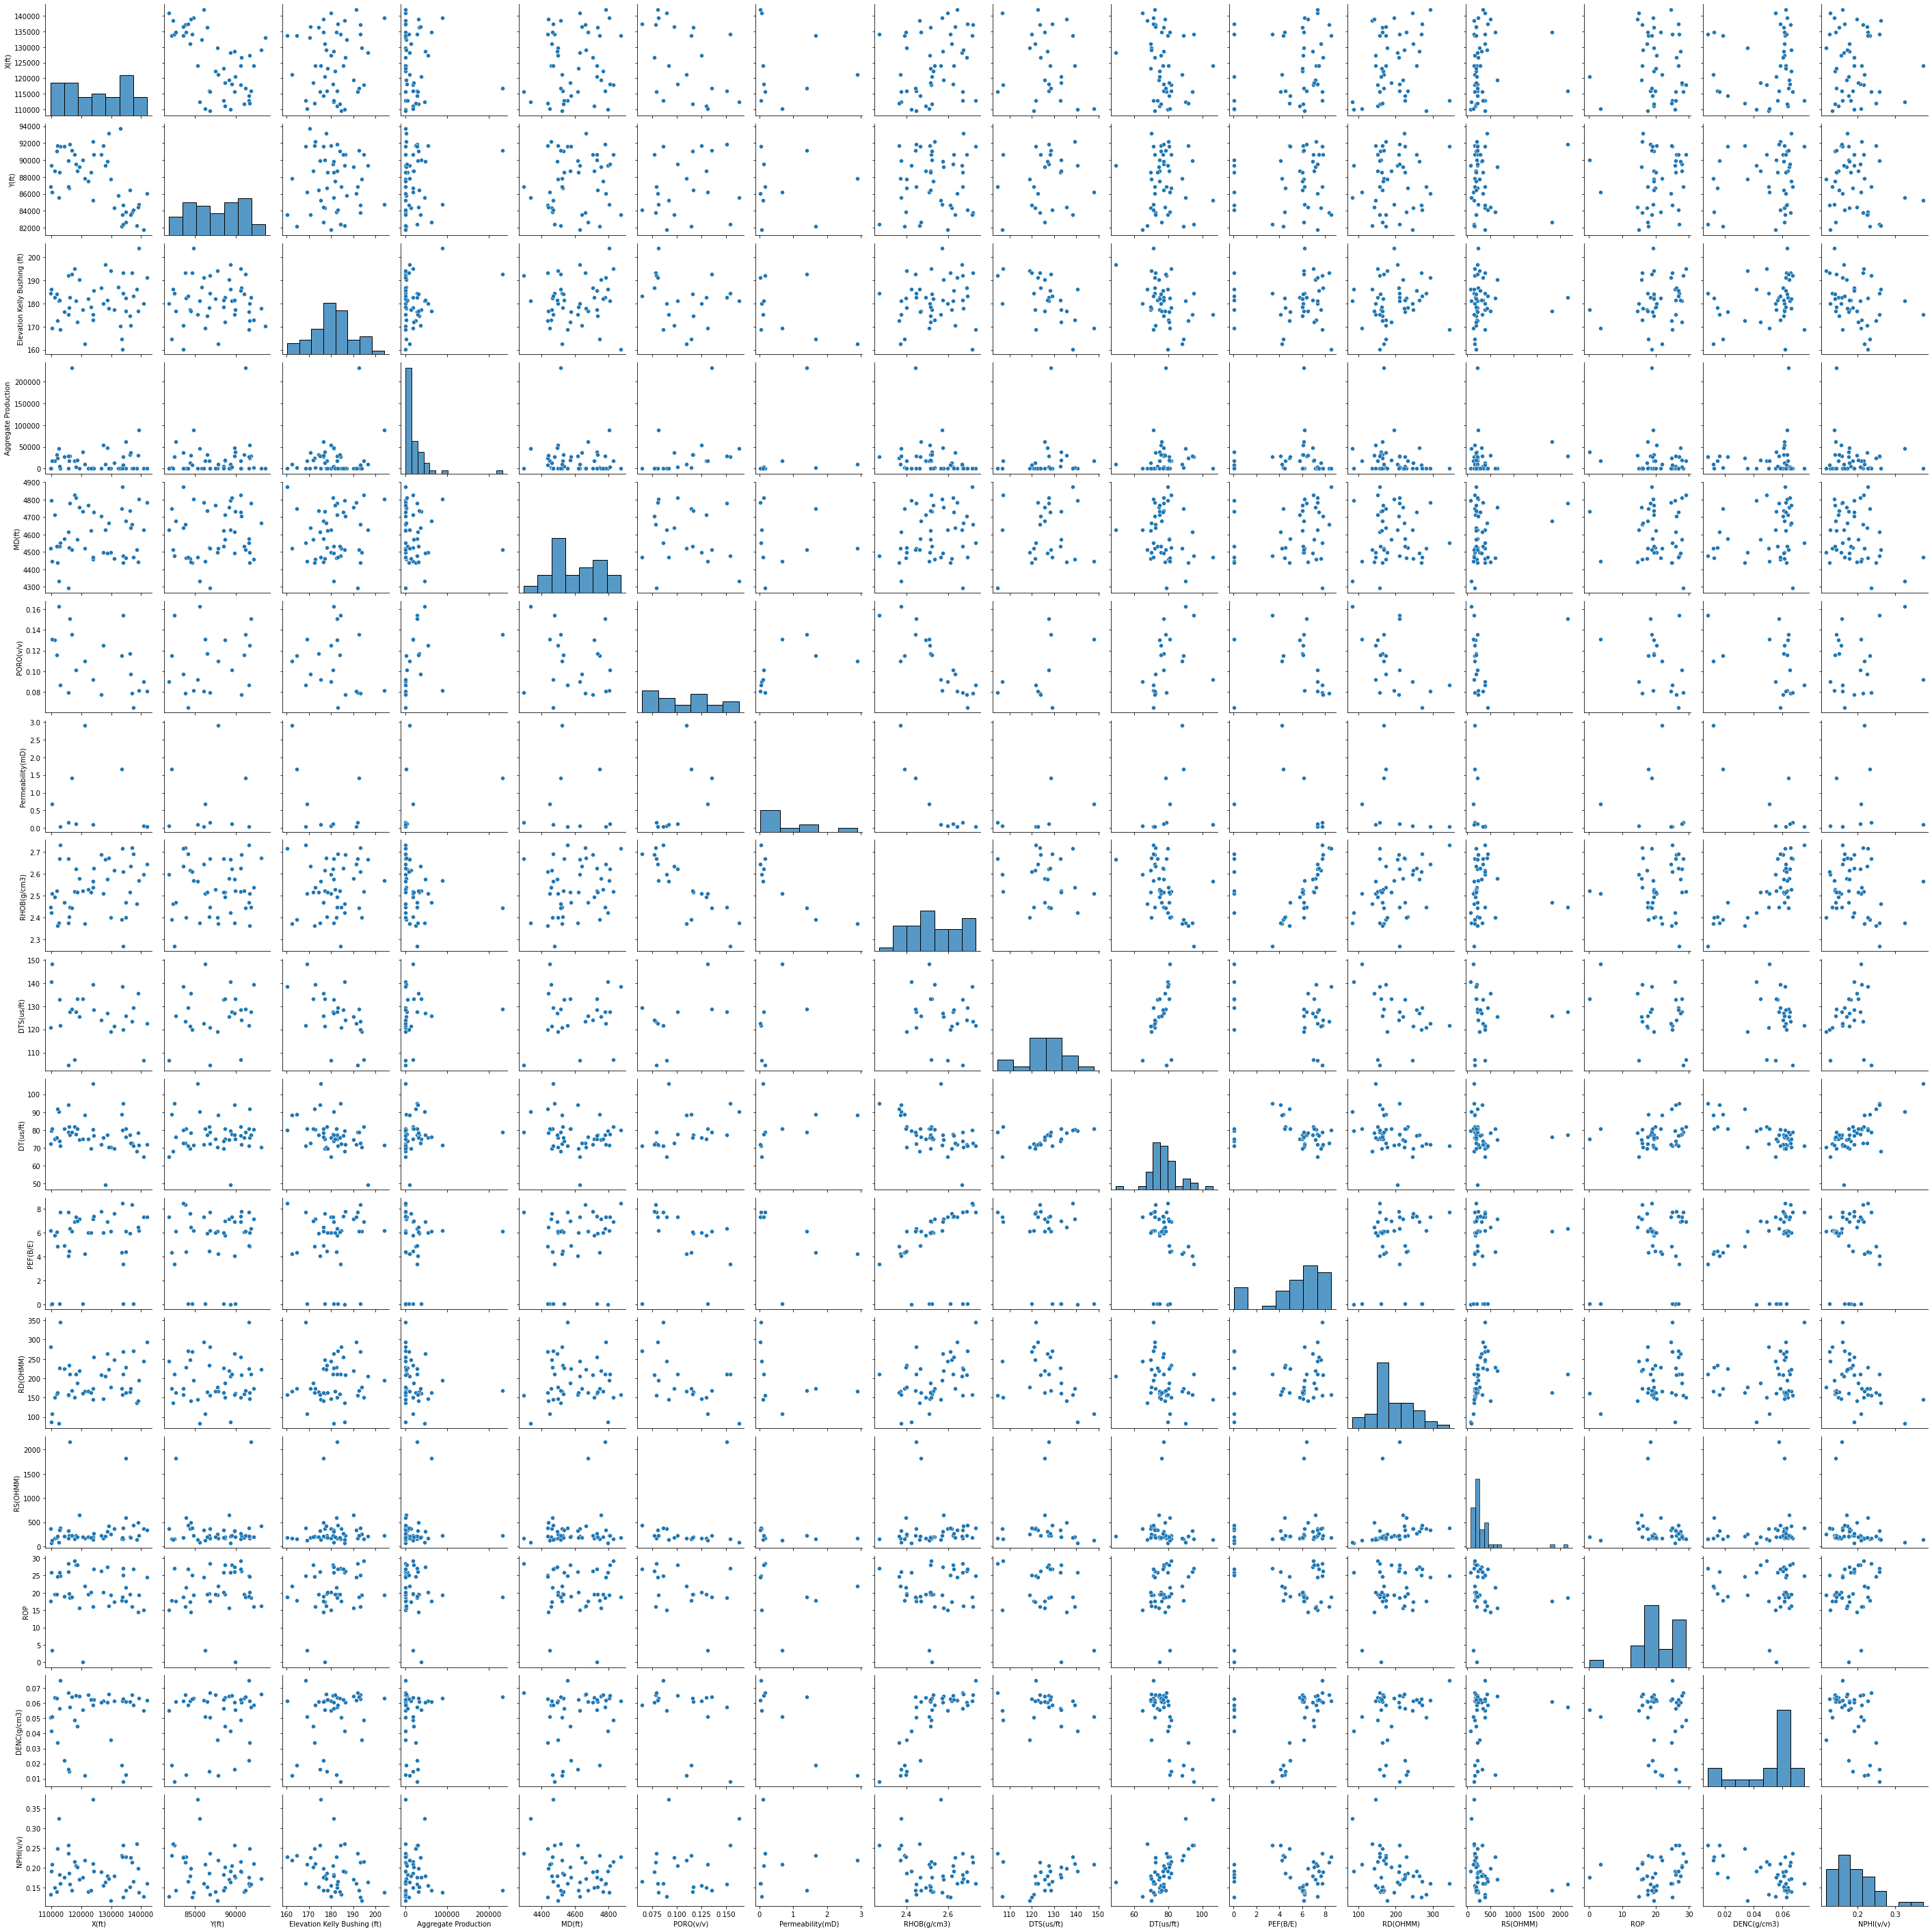

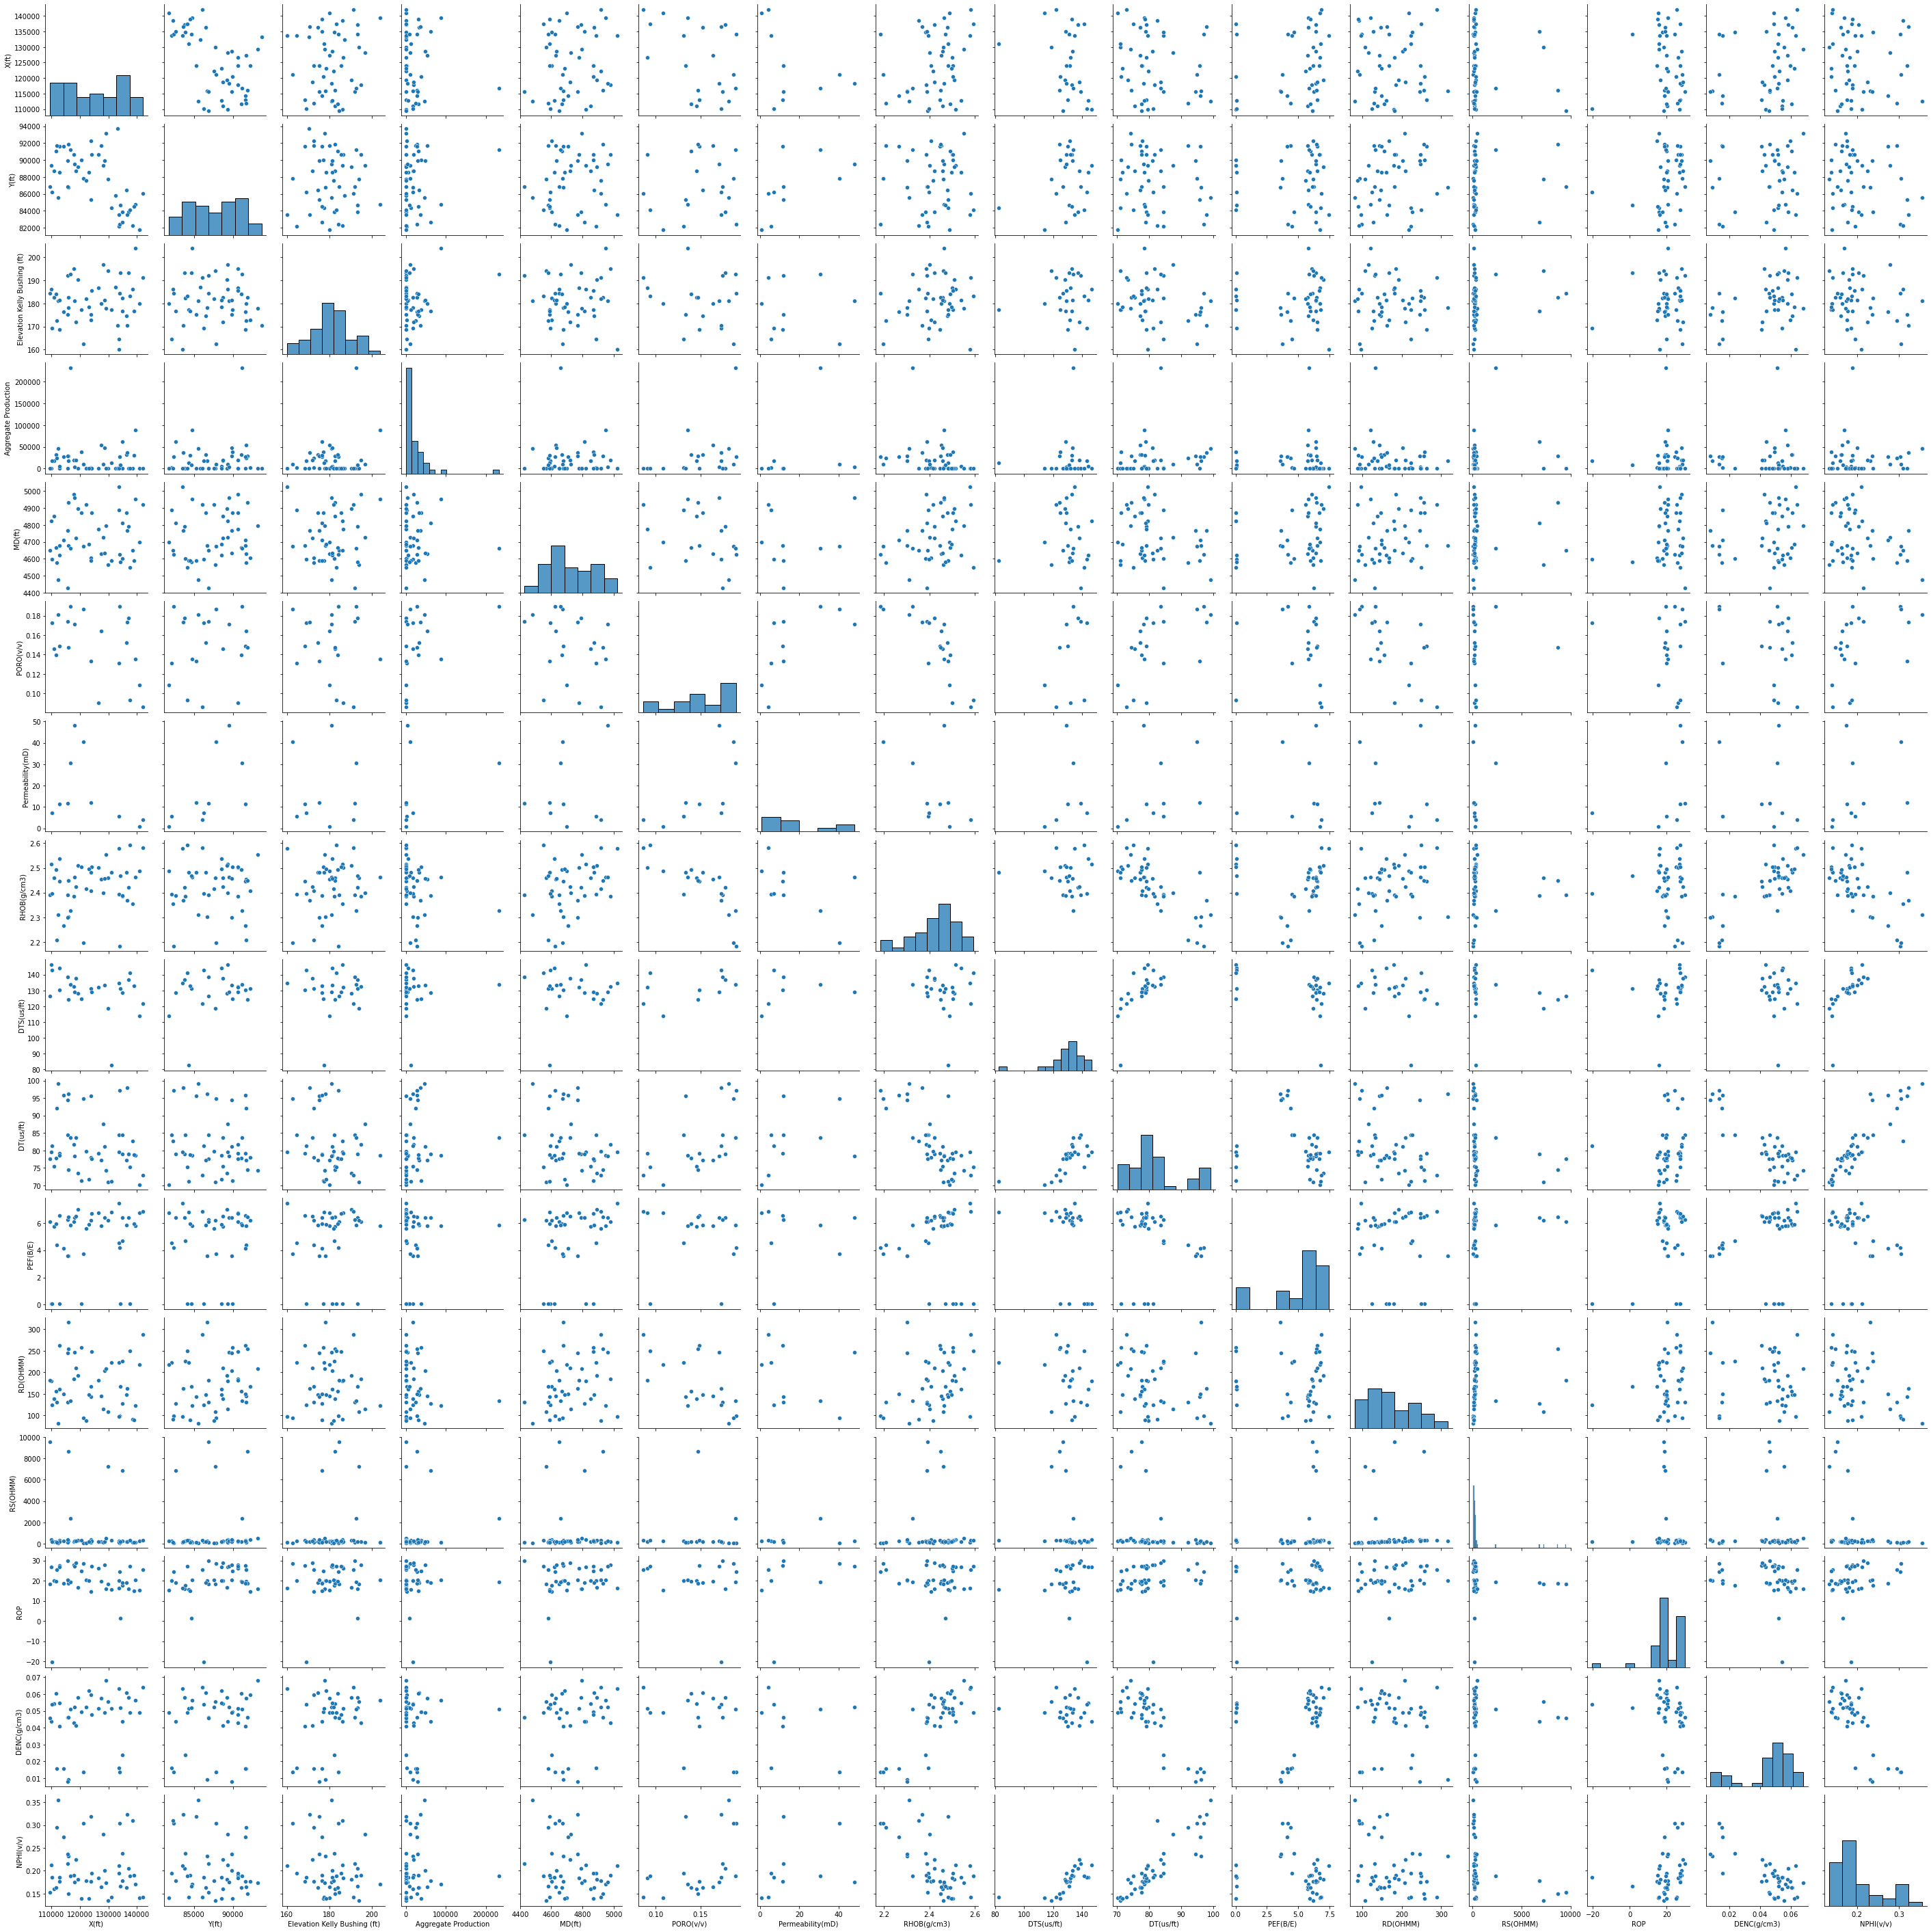

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Replaces -999 values with NaN
def make_nan(df):
    column_names = df.columns.values.tolist() # List of column names
    for column in column_names:
        if column != 'Zone': # Filled with strings so it can cause error
            df.loc[df[column] < -997, column] = np.nan # Replace -999 with NaN
        
def fill_data(df, well_log, well_log_data):
    # Get mean values for each well feature
    feature_means = df.mean(numeric_only=True).T

    # Append feature_means[index] into data_list[well][index]
    for feature in range(len(feature_means)):
        if feature != 12: # Don't have a mean for 'Zone' value
            well_log_data[well_log][feature] = feature_means[feature]

def main():
    # Code modified from https://www.geeksforgeeks.org/how-to-read-all-csv-files-in-a-folder-in-pandas/
    # Get CSV files from Well_Log folder
    path = str(os.getcwd()) + '/Well_Log'
    all_logs = glob.glob(os.path.join(path, "WP*.csv"))

    # Store all well log info
    well_log_data = [ [0]*12 for _ in range(50) ]
    well_log_data_upper = [ [0]*12 for _ in range(50) ]
    well_log_data_lower = [ [0]*12 for _ in range(50) ]

    # Loop through each log individually
    for well_log in range(len(all_logs)):
        df = pd.read_csv(all_logs[well_log])
        # well_name = all_logs[well_log].split('\\')[-1].split('.')[0]
        column_headers = df.columns
        column_headers = column_headers[:-1]

        # Convert -999 to NaN
        make_nan(df)
        
        # Get upper and lower here
        upper_df = df.loc[df['Zone'] == 'Upper']
        lower_df = df.loc[df['Zone'] == 'Lower']

        fill_data(df, well_log, well_log_data)
        fill_data(upper_df, well_log, well_log_data_upper)
        fill_data(lower_df, well_log, well_log_data_lower)


    # Create a dataframe with the mean values
    mean_df = pd.DataFrame(well_log_data, columns = column_headers)
    mean_df_upper = pd.DataFrame(well_log_data_upper, columns = column_headers)
    mean_df_lower = pd.DataFrame(well_log_data_lower, columns = column_headers)


    # Get path to csv file with production info
    production_csv_path = str(os.getcwd()) + '\Well_Head_and_Completion_Aggprod.csv'  
    production_df = pd.read_csv(production_csv_path)

    # Combine the dataframes
    combined_df = pd.concat([production_df, mean_df.set_index(production_df.index)], axis=1)
    del combined_df['Completion']    
    print(combined_df)    
    print(combined_df.describe().T)

    combined_df_upper = pd.concat([production_df, mean_df_upper.set_index(production_df.index)], axis=1)
    del combined_df_upper['Completion']
    print(combined_df_upper)    
    print(combined_df_upper.describe().T)

    combined_df_lower = pd.concat([production_df, mean_df_lower.set_index(production_df.index)], axis=1)
    del combined_df_lower['Completion']
    print(combined_df_lower)    
    print(combined_df_lower.describe().T)

    headers = combined_df.columns
    sns.pairplot(combined_df_upper, vars = ['X(ft)', 'Y(ft)', 'Elevation Kelly Bushing (ft)', 'Aggregate Production', 'MD(ft)', 'PORO(v/v)', 'Permeability(mD)', 'RHOB(g/cm3)', 'DTS(us/ft)', 'DT(us/ft)', 'PEF(B/E)', 'RD(OHMM)', 'RS(OHMM)', 'ROP', 'DENC(g/cm3)', 'NPHI(v/v)'], markers = 'o')
    sns.pairplot(combined_df_lower, vars = ['X(ft)', 'Y(ft)', 'Elevation Kelly Bushing (ft)', 'Aggregate Production', 'MD(ft)', 'PORO(v/v)', 'Permeability(mD)', 'RHOB(g/cm3)', 'DTS(us/ft)', 'DT(us/ft)', 'PEF(B/E)', 'RD(OHMM)', 'RS(OHMM)', 'ROP', 'DENC(g/cm3)', 'NPHI(v/v)'], markers = 'o')



if __name__ == '__main__':
    main()

    WELL      X(ft)     Y(ft)  Elevation Kelly Bushing (ft)  \
0    WP0  137106.82  83818.47                        193.32   
1    WP1  132460.98  85832.77                        187.15   
2    WP2  133634.00  82144.52                        164.55   
3    WP3  140892.57  81747.12                        179.92   
4    WP4  109951.43  89343.45                        186.21   
5    WP5  123950.95  92227.31                        172.80   
6    WP6  111035.32  88692.32                        182.66   
7    WP7  112439.69  85560.85                        181.09   
8    WP8  127369.74  91739.99                        180.04   
9    WP9  115943.69  86730.44                        178.25   
10  WP10  134042.86  82411.27                        184.33   
11  WP11  115725.49  86866.60                        192.03   
12  WP12  133136.98  93691.55                        170.35   
13  WP13  119311.27  89234.02                        190.28   
14  WP14  134837.26  83865.82                        18

    WELL      X(ft)     Y(ft)  Elevation Kelly Bushing (ft)  \
0    WP0  137106.82  83818.47                        193.32   
1    WP1  132460.98  85832.77                        187.15   
2    WP2  133634.00  82144.52                        164.55   
3    WP3  140892.57  81747.12                        179.92   
4    WP4  109951.43  89343.45                        186.21   
5    WP5  123950.95  92227.31                        172.80   
6    WP6  111035.32  88692.32                        182.66   
7    WP7  112439.69  85560.85                        181.09   
8    WP8  127369.74  91739.99                        180.04   
9    WP9  115943.69  86730.44                        178.25   
10  WP10  134042.86  82411.27                        184.33   
11  WP11  115725.49  86866.60                        192.03   
12  WP12  133136.98  93691.55                        170.35   
13  WP13  119311.27  89234.02                        190.28   
14  WP14  134837.26  83865.82                        18

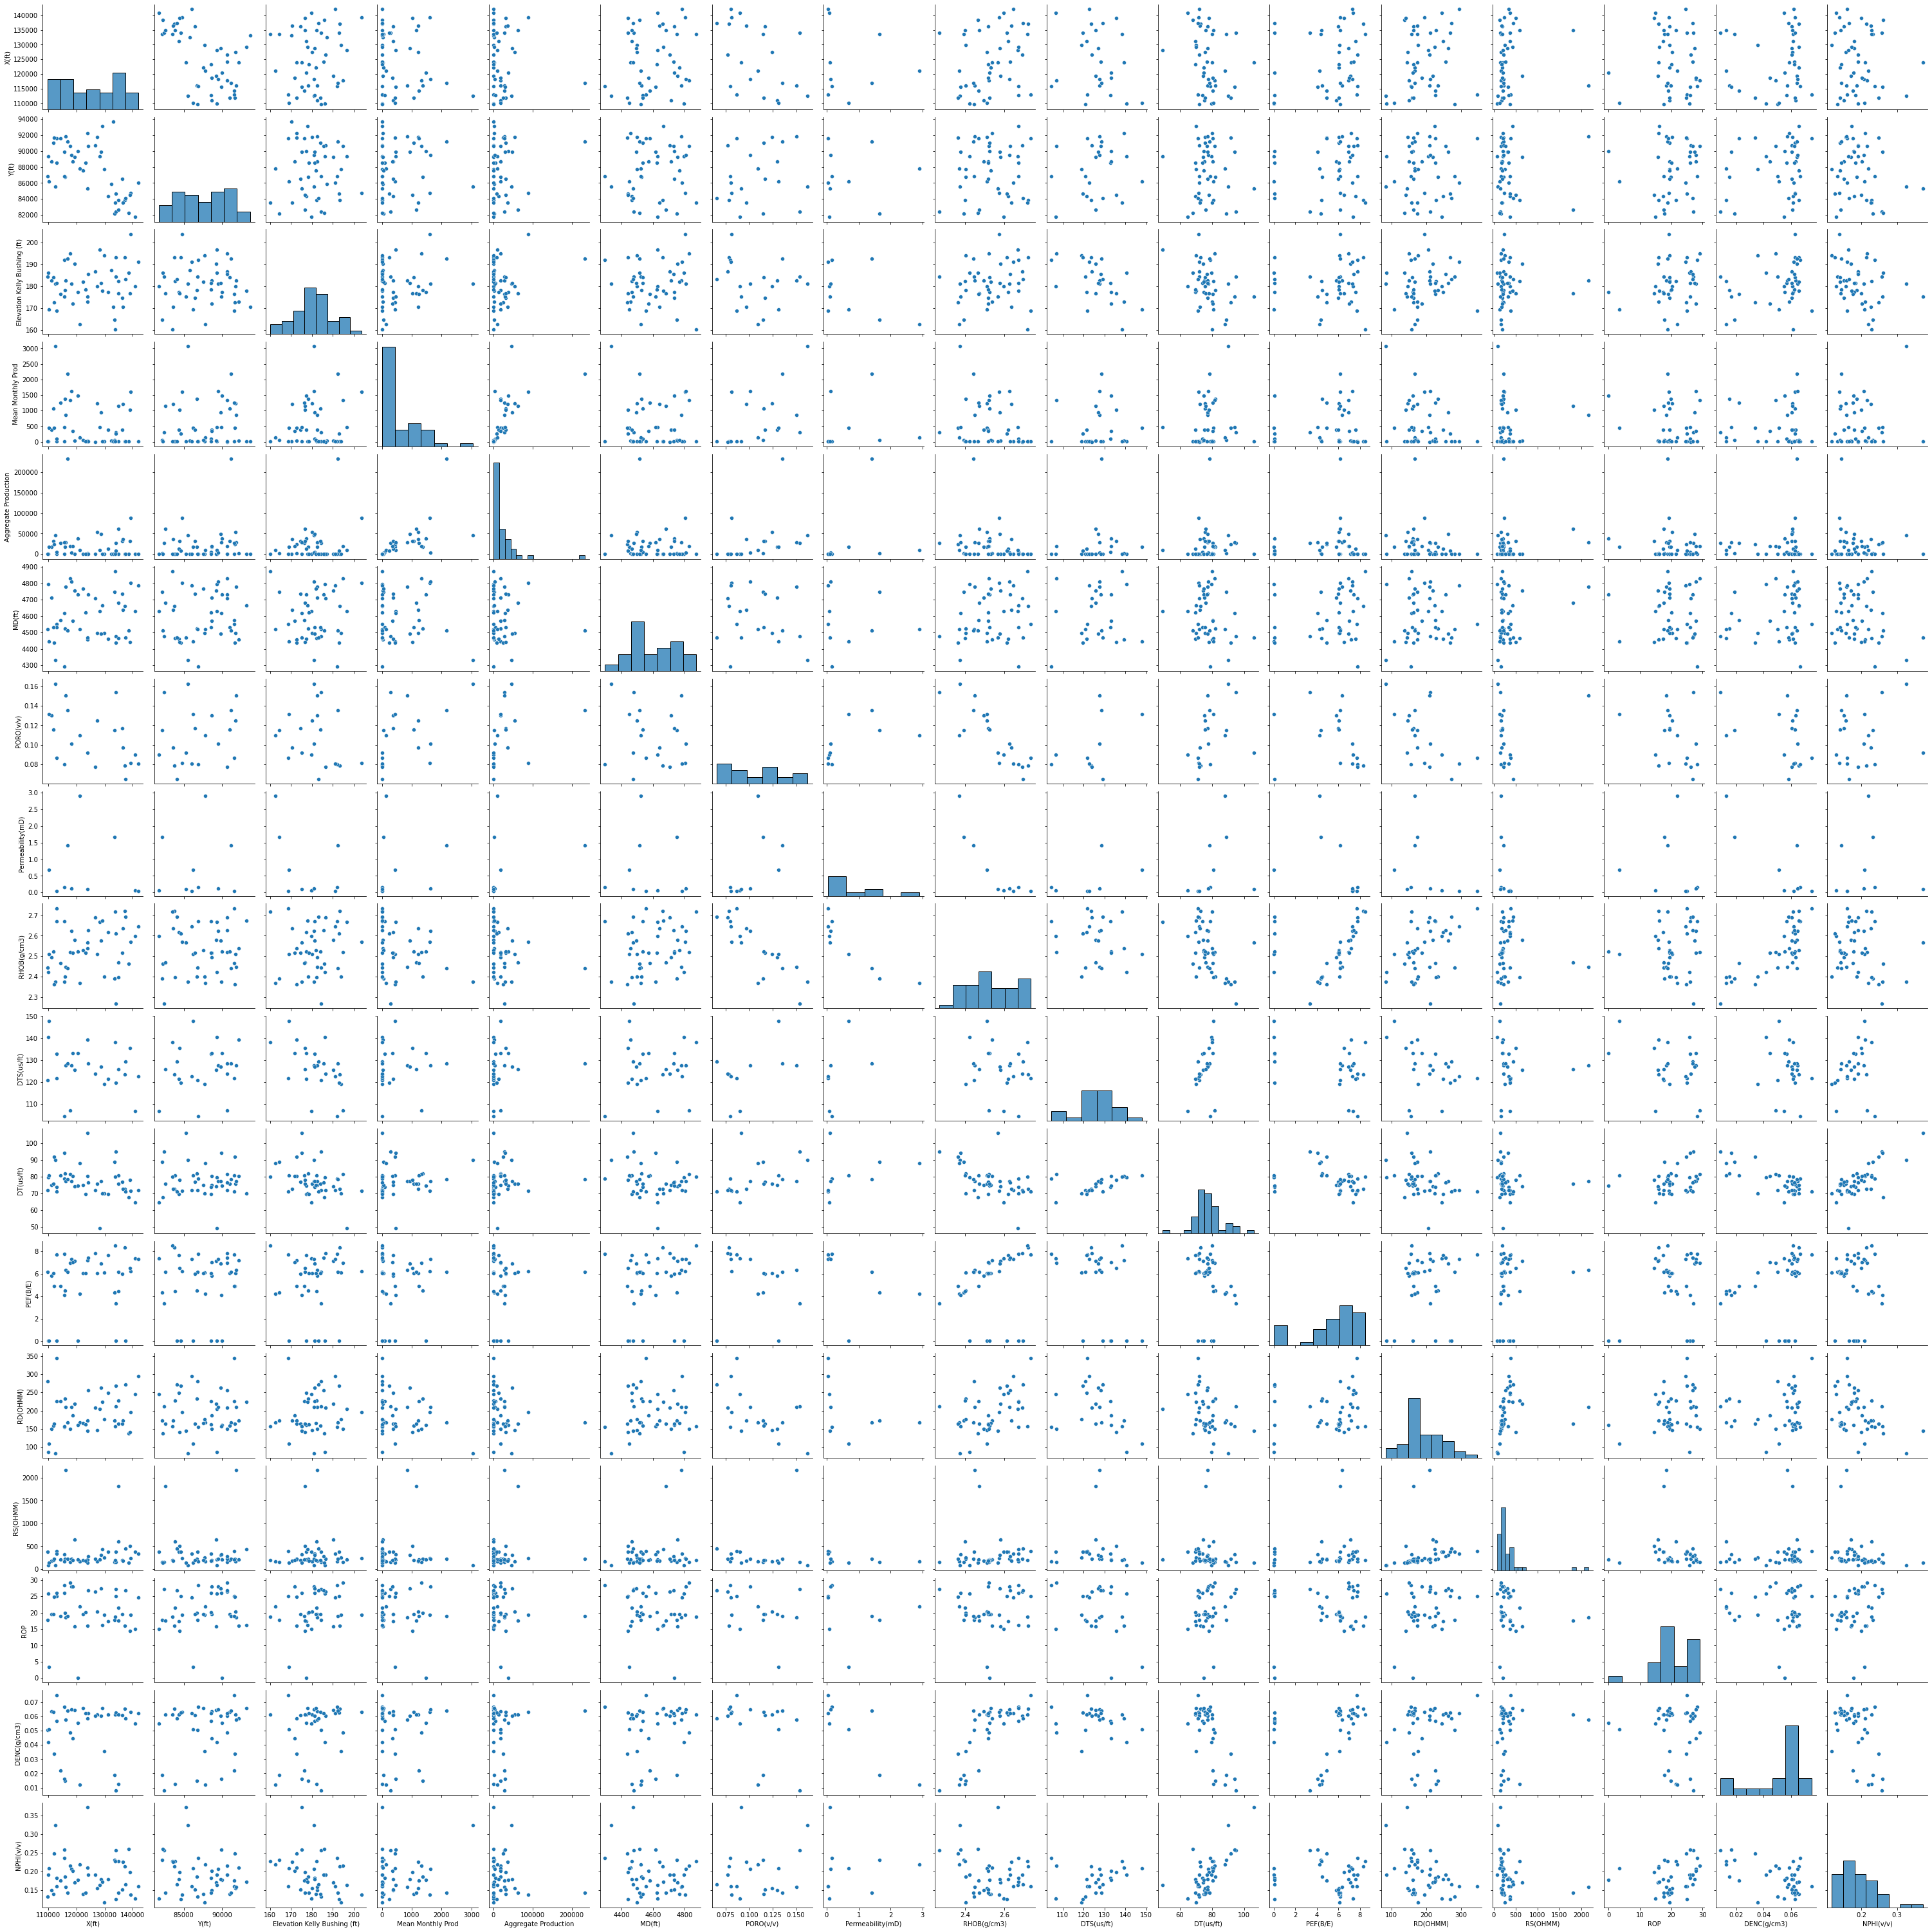

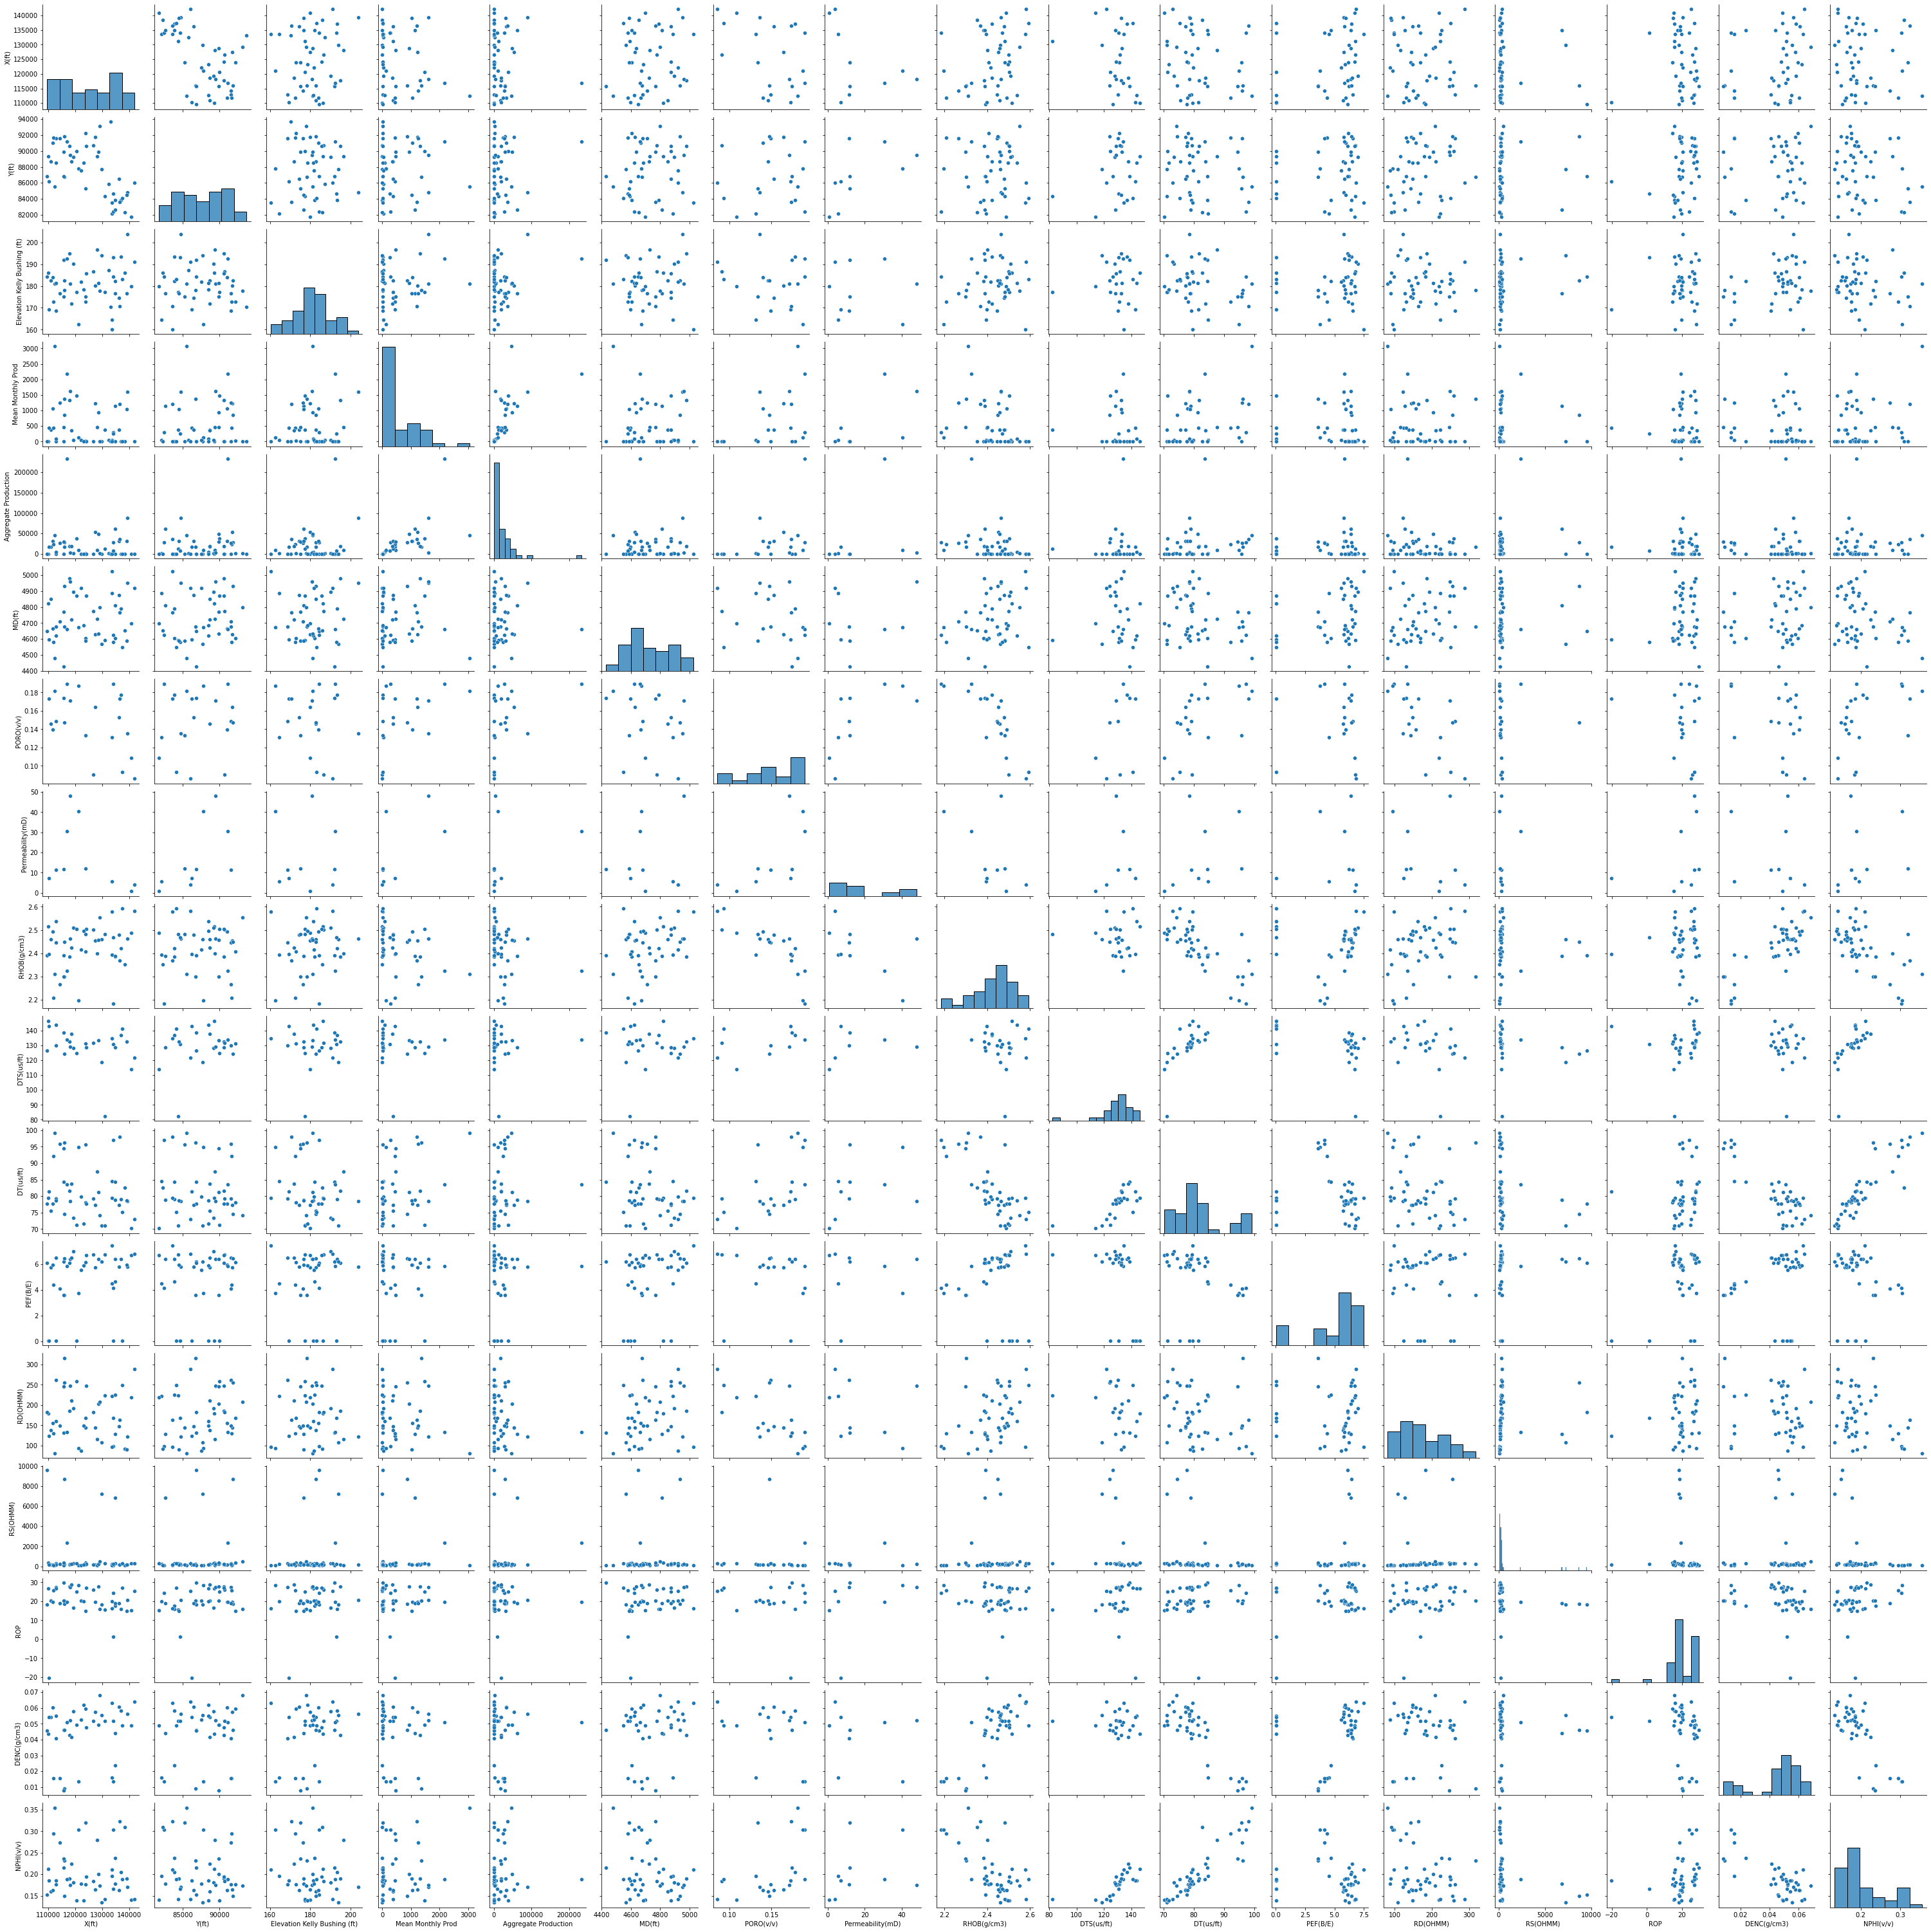

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Replaces -999 values with NaN
def make_nan(df):
    column_names = df.columns.values.tolist() # List of column names
    for column in column_names:
        if column != 'Zone': # Filled with strings so it can cause error
            df.loc[df[column] < -997, column] = np.nan # Replace -999 with NaN
        
def fill_data(df, well_log, well_log_data):
    # Get mean values for each well feature
    feature_means = df.mean(numeric_only=True).T

    # Append feature_means[index] into data_list[well][index]
    for feature in range(len(feature_means)):
        if feature != 12: # Don't have a mean for 'Zone' value
            well_log_data[well_log][feature] = feature_means[feature]

def main():
    # Code modified from https://www.geeksforgeeks.org/how-to-read-all-csv-files-in-a-folder-in-pandas/
    # Get CSV files from Well_Log folder
    path = str(os.getcwd()) + '/Well_Log'
    all_logs = glob.glob(os.path.join(path, "WP*.csv"))

    # Store all well log info
    well_log_data = [ [0]*12 for _ in range(50) ]
    well_log_data_upper = [ [0]*12 for _ in range(50) ]
    well_log_data_lower = [ [0]*12 for _ in range(50) ]

    # Loop through each log individually
    for well_log in range(len(all_logs)):
        df = pd.read_csv(all_logs[well_log])
        # well_name = all_logs[well_log].split('\\')[-1].split('.')[0]
        column_headers = df.columns
        column_headers = column_headers[:-1]

        # Convert -999 to NaN
        make_nan(df)
        
        # Get upper and lower here
        upper_df = df.loc[df['Zone'] == 'Upper']
        lower_df = df.loc[df['Zone'] == 'Lower']

        fill_data(df, well_log, well_log_data)
        fill_data(upper_df, well_log, well_log_data_upper)
        fill_data(lower_df, well_log, well_log_data_lower)


    # Create a dataframe with the mean values
    mean_df = pd.DataFrame(well_log_data, columns = column_headers)
    mean_df_upper = pd.DataFrame(well_log_data_upper, columns = column_headers)
    mean_df_lower = pd.DataFrame(well_log_data_lower, columns = column_headers)


    # Get path to csv file with production info
    production_csv_path = str(os.getcwd()) + '\Well_Head_and_Completion_Aggprod.csv'  
    production_df = pd.read_csv(production_csv_path)

    # Combine the dataframes
    combined_df = pd.concat([production_df, mean_df.set_index(production_df.index)], axis=1)
    del combined_df['Completion']    
    print(combined_df)    
    print(combined_df.describe().T)

    combined_df_upper = pd.concat([production_df, mean_df_upper.set_index(production_df.index)], axis=1)
    del combined_df_upper['Completion']
    print(combined_df_upper)    
    print(combined_df_upper.describe().T)

    combined_df_lower = pd.concat([production_df, mean_df_lower.set_index(production_df.index)], axis=1)
    del combined_df_lower['Completion']
    print(combined_df_lower)    
    print(combined_df_lower.describe().T)

    df_production = pd.read_csv("Production_History_Field.csv")

    list_prod_mean =[]
    list_wells = []
    for column in df_production.columns[1:df_production.shape[1]]:
        list_wells.append(column.split(':')[1].split('(')[0])
        list_prod_mean.append((df_production[column].loc[df_production[column] != 0]).mean())
    df_prod = pd.DataFrame(list(zip(list_wells,list_prod_mean)), columns=['WELL','Mean Monthly Prod'])

    monthly_prod = df_prod['Mean Monthly Prod'].to_list()
    print(monthly_prod)

    combined_df.insert(4, 'Mean Monthly Prod', monthly_prod, True)
    print(combined_df)    
    print(combined_df.describe().T)

    combined_df_upper.insert(4, 'Mean Monthly Prod', monthly_prod, True)
    print(combined_df_upper)    
    print(combined_df_upper.describe().T)

    combined_df_lower.insert(4, 'Mean Monthly Prod', monthly_prod, True)
    print(combined_df_lower)    
    print(combined_df_lower.describe().T)

    sns.pairplot(combined_df_upper, vars = ['X(ft)', 'Y(ft)', 'Elevation Kelly Bushing (ft)', 'Mean Monthly Prod', 'Aggregate Production', 'MD(ft)', 'PORO(v/v)', 'Permeability(mD)', 'RHOB(g/cm3)', 'DTS(us/ft)', 'DT(us/ft)', 'PEF(B/E)', 'RD(OHMM)', 'RS(OHMM)', 'ROP', 'DENC(g/cm3)', 'NPHI(v/v)'], markers = 'o')
    sns.pairplot(combined_df_lower, vars = ['X(ft)', 'Y(ft)', 'Elevation Kelly Bushing (ft)', 'Mean Monthly Prod', 'Aggregate Production', 'MD(ft)', 'PORO(v/v)', 'Permeability(mD)', 'RHOB(g/cm3)', 'DTS(us/ft)', 'DT(us/ft)', 'PEF(B/E)', 'RD(OHMM)', 'RS(OHMM)', 'ROP', 'DENC(g/cm3)', 'NPHI(v/v)'], markers = 'o')




if __name__ == '__main__':
    main()